In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [3]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('emails.csv')

In [5]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
df.loc[df.spam==1]

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [7]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))


spam count: 1368
not spam count: 4360


In [8]:
print(df.shape)
df['spam'] = df['spam'].astype(int)

(5728, 2)


In [9]:
df = df.drop_duplicates()
print(df.shape)

(5695, 2)


In [10]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
df = df.reset_index(inplace = False)[['text','spam']]

In [12]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [13]:
df['spam'].unique()

array([1, 0])

In [14]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()        
df.head(3)

,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1


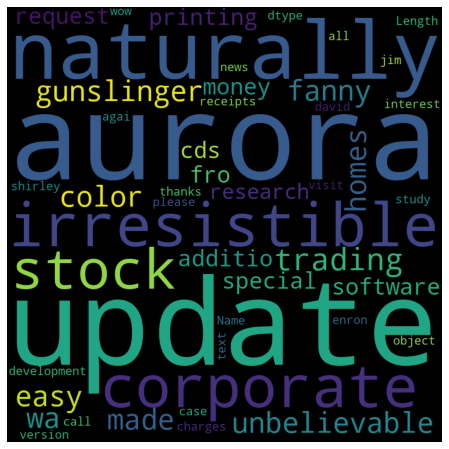

In [15]:
df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
text_vec = CountVectorizer().fit_transform(df['text'])
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45, random_state = 42, shuffle = True)

In [17]:
text_vec

<5695x33688 sparse matrix of type '<class 'numpy.int64'>'
	with 660304 stored elements in Compressed Sparse Row format>

In [18]:
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #learning rate
    max_depth = 6
)

In [19]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.91      0.94       637

    accuracy                           0.97      2563
   macro avg       0.98      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563

